# **Predicting Housing Prices Using Linear Regression**

## Project Overview
I have built a linear regression model to predict housing prices based on various features of the house, such as size, number of bedrooms, age, and location. This project involves data preprocessing, model building, training, and evaluation, using Python libraries like **Numpy** for calculations, **Pandas** for data manipulation, **Matplotlib** for visualization, and **Scikit-learn** for building the regression model.

## Goals

- Explore and preprocess the dataset.
- Use linear regression to predict housing prices.
- Evaluate the model's performance.
- Interpret the model to understand the influence of different features on housing prices.

------------

# Linear Regression Analysis

## Introduction to Linear Regression

Linear regression is a statistical method that models the relationship between a dependent variable and one or more independent variables by fitting a linear equation to observed data. The equation for a simple linear regression (one independent variable) is:



where:
-  is the dependent variable,
-  is the independent variable,
-  is the y-intercept,
-  is the slope, and
-  represents the error term.

The goal of linear regression is to find the best-fitting straight line through the data points that minimizes the sum of the squared differences between the observed values and the values predicted by the line.

## Assumptions of Linear Regression

Linear regression analysis requires several key assumptions about the data:
1. **Linearity**: The relationship between the independent and dependent variables is linear.
2. **Independence**: Observations are independent of each other.
3. **Homoscedasticity**: The variance of error terms (residuals) is constant across all levels of the independent variables.
4. **Normality**: The residuals of the model are normally distributed.

## Model Evaluation Metrics

To evaluate the performance of a linear regression model, we typically use the following metrics:
- **R-squared (R²)**: Represents the proportion of the variance in the dependent variable that is predictable from the independent variables. Ranges from 0 to 1.
- **Mean Squared Error (MSE)**: The average of the squares of the errors between observed and predicted values.
- **Root Mean Squared Error (RMSE)**: The square root of MSE, providing a measure of the average deviation of the predictions from the observed values.

## Coefficient Interpretations

The coefficients  and  provide insights into the relationship between the independent variable(s) and the dependent variable:
-  (Intercept): Represents the expected value of  when all independent variables are 0.
-  (Slope): Indicates the change in the dependent variable for a one-unit change in the independent variable, holding all other variables constant.

In the context of linear algebra, these coefficients can be found by solving the normal equations, which minimize the sum of squared residuals. This process involves matrix operations, highlighting the importance of linear algebra in linear regression analysis.

The coefficients tell us how much the target variable (in this case, 'MEDV', median house value) is expected to increase when that feature increases by one unit, holding all other features constant. Here's how to interpret some possible coefficients:

- **Positive Coefficients:** If a coefficient is positive, it means that as the value of that feature increases, the value of the target variable (housing price) also increases. For example, if the coefficient for RM (average number of rooms per dwelling) is positive, it indicates that houses with more rooms tend to be more expensive.
- **Negative Coefficients:** A negative coefficient indicates an inverse relationship between the feature and the target variable. For instance, if the coefficient for CRIM (per capita crime rate by town) is negative, it suggests that a higher crime rate is associated with lower house prices.
- **Magnitude of Coefficients:** The size of the coefficient indicates the strength of the impact on the target variable. A larger absolute value means a stronger effect.

## Conclusion

This project applied linear regression to predict housing prices based on various features. These results demonstrate the power of linear regression in understanding and predicting relationships between variables in data science.

---------------

# Steps to implement the project
- **Step 1:** Setting Up the Environment

    `$ conda create --name housing_prices python=3.8`

    `$ conda activate housing_prices`

    `$ conda install numpy pandas matplotlib scikit-learn jupyter`

- **Step 2:** Starting the Project

    `$ jupyter notebook`

- **Step 3:** Implementing the Project
    - Import libraries
    - Load and Explore the Dataset
    - Data Preprocessing (Handle missing values, if any + Feature selection)
    - Visualize the Data
    - Split the Data into training and testing sets
    - Build and Train the Linear Regression Model
    - Predict and Evaluate the Model
    - Interpret the Model

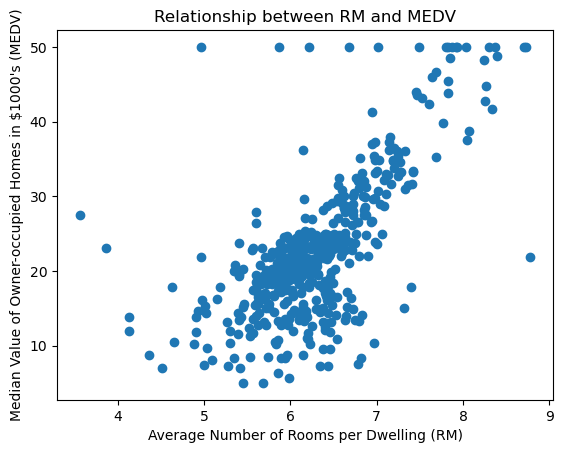

RMSE: 4.92860218266533
R^2 Score: 0.6687594935356329

Feature | Coefficient
------------------
CRIM    |   -0.113
ZN      |    0.030
INDUS   |    0.040
CHAS    |    2.784
NOX     |  -17.203
RM      |    4.439
AGE     |   -0.006
DIS     |   -1.448
RAD     |    0.262
TAX     |   -0.011
PTRATIO |   -0.915
B       |    0.012
LSTAT   |   -0.509


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Boston housing dataset
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Creating a DataFrame
features = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]
df_boston = pd.DataFrame(data, columns=features)
df_boston['MEDV'] = target

# Handling missing values: Fill with mean
df_boston.isnull().sum()
df_boston.fillna(df_boston.mean(), inplace=True)

# Use Matplotlib to visualize relationships between features and the target variable (price)
plt.scatter(df_boston['RM'], df_boston['MEDV'])
plt.xlabel('Average Number of Rooms per Dwelling (RM)')
plt.ylabel('Median Value of Owner-occupied Homes in $1000\'s (MEDV)')
plt.title('Relationship between RM and MEDV')
plt.show()

# Split the data into training and testing sets
X = df_boston.drop('MEDV', axis=1)
y = df_boston['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Use the model to make predictions on the test set
# Evaluate the model using metrics like RMSE and R^2 score
y_pred = model.predict(X_test)
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R^2 Score:", r2_score(y_test, y_pred))
print()

# Retrieve the coefficients (weights)
coefficients = model.coef_
features = X.columns
coeff_dict = dict(zip(features, coefficients))

# Calculate the maximum length of the feature names for left alignment
max_feature_length = max(len(feature) for feature in coeff_dict.keys())

# Assume a fixed width for the right-aligned numbers, based on the expected size
# This includes the decimal point and two decimal places, plus some padding
number_width = 8

# Print headers for the columns, adjusting spacing as needed
print(f"{'Feature'.ljust(max_feature_length)} | {'Coefficient'.rjust(number_width)}")

# Separator for clarity, adjust '-' multiplication as needed
print('-' * (max_feature_length + number_width + 3))  # 3 for " | " and spaces

# Print each feature and its coefficient in two columns
for feature, coeff in coeff_dict.items():
    # Left-align the feature name, right-align the coefficient
    print(f"{feature.ljust(max_feature_length)} | {coeff:>{number_width}.3f}")